## Importing libraries

In [72]:
import pandas as pd
import numpy as np
import os
from copy import copy
import seaborn as sb
import matplotlib.pyplot as plt

## setting up expriment related variables

#### column names

In [7]:
columns = ["algo", "experiment_id", "dataset", "seed", "generation", "training_fitness", "timing", "pop_node_count"]

## defining helping functions

In [8]:
def get_column_names(log_level = 1, base_cols = columns):
    base_cols = copy(base_cols)
    
    if log_level == 1:
        base_cols.append("test_fitness", "log_level")
    
    elif log_level == 2:
        base_cols.extend(["test_fitness","genotypic_diversity", "phenotipic_diversity", "log_level"])
    elif log_level == 3:
        base_cols.extend(["test_fitness","pop_nodes", "pop_fitnesses", "log_level"])
    else:
        base_cols.extend(["test_fitness","genotypic_diversity", "phenotipic_diversity","pop_nodes", "pop_fitnesses",
                         "log_level"])
    
    return base_cols

In [9]:
def get_experiment_results(experiment_id=None, logger_name="logger_checking.csv", base_cols = columns, experiment_id_index=1):
    
    # getting the path to the logger file
    logger = os.path.join(os.getcwd().split("utils")[0], "main" ,"log", logger_name)
    
    # loading logger data into a pandas dataframe
    results = pd.read_csv(logger, header = None , index_col=None)
    
    
    # getting the experiment id of the last row in the logger data, if -1 is given as the experiment id
    if experiment_id == -1:
        
        # getting the experiment id of the last experiment
        experiment_id = results[experiment_id_index].iloc[-1]
        
        # filtering the results to only contain the required experiment_id
        results = results[results[experiment_id_index] == experiment_id].dropna(axis=1)
    
    # if a specific expriment id was given
    elif isinstance(experiment_id, str):
        results = results[results[experiment_id_index] == experiment_id].dropna(axis=1)
    
    # if a list of experiment_ids was given
    elif isinstance(experiment_id, list):
        
        # filtering the results to only contain the required experiment_ids
        results = results[results[experiment_id_index].isin(experiment_id)].dropna(axis=1)
    
    # if experiment_id is none, return the entire logger dataset
    else:
        
        # getting the column names from the inffered log level:
        colnames = get_column_names(log_level=results.iloc[-1].iloc[-1], base_cols=base_cols)

        results.columns = colnames
        
        # returning the results
        return results.drop(columns=["log_level"])
        
    
    
    # getting the column names from the inffered log level:
    colnames = get_column_names(log_level=results.iloc[-1].iloc[-1], base_cols=base_cols)
    
    results.columns = colnames
    
    # returning the results
    return results.drop(columns=["log_level"])

In [88]:
def show_results(x_var, y_var = "generation", experiment_id = -1, logger_name="logger_checking.csv", colnames=columns, log_level=2, dataset=None):
    
    # getting the col_names based on the log level:
    cols = get_column_names(log_level=log_level, base_cols=colnames)
    # getting the results dataframe
    df = get_experiment_results(experiment_id=experiment_id, logger_name=logger_name)
    
    # obtaining the results only for the specific dataset
    if dataset is not None:
        plotting = df[df["dataset"] == dataset]
        
    # performing a groupby on the variables of interest
        plotting = pd.DataFrame(plotting.groupby([x_var, "algo"])[y_var].median())

        sb.lineplot(data=plotting, x = x_var, y=y_var, hue = "algo")
        plt.xlabel(x_var)
        plt.ylabel(y_var)
        plt.title(f'{dataset.capitalize()}')
        plt.show()

    else:
        for ds in df.dataset.unique():
            # keeping only one dataset at a time
            plotting = df[df["dataset"] == ds]
            
            # performing a groupby on the variables of interest
            plotting = pd.DataFrame(plotting.groupby([x_var, "algo"])[y_var].median())
            
            sb.lineplot(data=plotting, x = x_var, y=y_var, hue = "algo")
            plt.xlabel(x_var)
            plt.ylabel(y_var)
            plt.title(f'{ds.capitalize()}')
            plt.show()
        

## Analysing the results

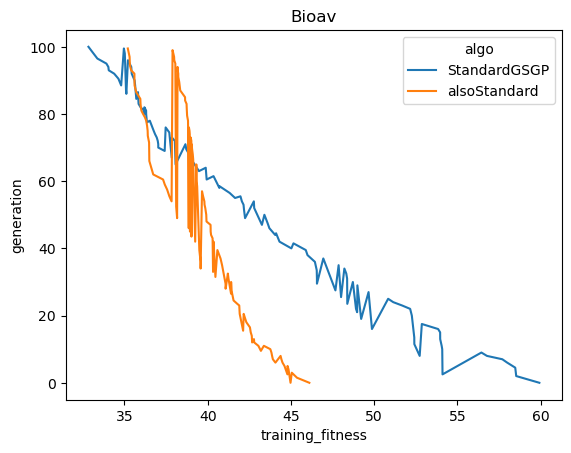

In [91]:
show_results(x_var = "training_fitness", y_var="generation", experiment_id=-1, logger_name="logger_checking.csv",
             log_level=2, dataset="bioav")